/home/kai_mul/.conda/envs/ImpCont/lib/python3.12/site-packages/blimpy/__init__.py:21: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


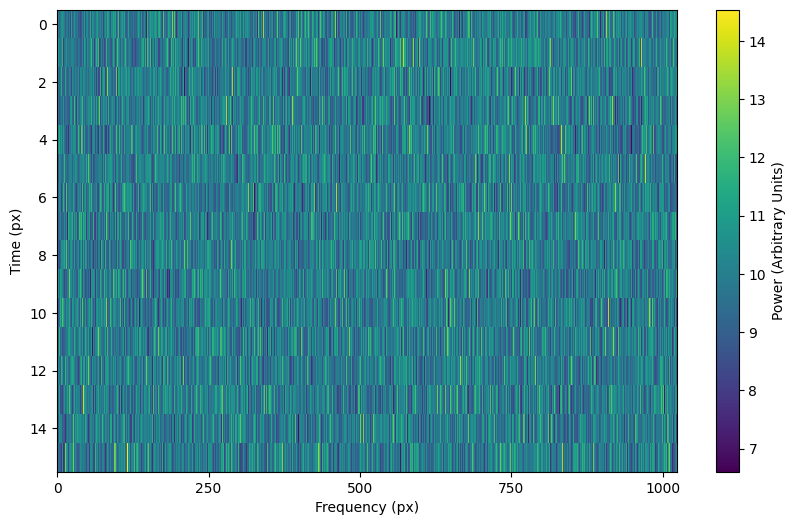

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u
import setigen as stg
%matplotlib inline

# Define time and frequency arrays, essentially labels for the 2D data array
fchans = 1024
tchans = 16
df = 2.7939677238464355*u.Hz
dt = 18.253611008*u.s
fch1 = 6095.214842353016*u.MHz

frame = stg.Frame(fchans=fchans,
                  tchans=tchans,
                  df=df,
                  dt=dt,
                  fch1=fch1)
noise = frame.add_noise(x_mean=10)

fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
plt.show()

In [3]:
intensity = frame.get_intensity(snr=10)
signal = frame.add_signal(
                stg.constant_path(
                    f_start=frame.get_frequency(200),
                    drift_rate=2 * u.Hz / u.s,
                ),
                stg.constant_t_profile(level=intensity),
                stg.box_f_profile(width=80 * u.Hz),
                stg.constant_bp_profile(level=1),
            )
print(signal)
for i in signal:
    for j in i:
        if j != 0:
            print(j)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.475368857441685
2.47536885744168

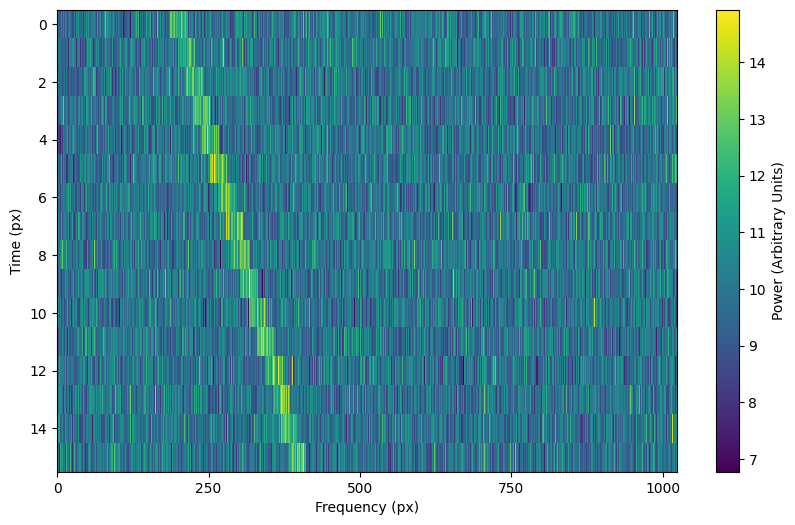

In [6]:
fig = plt.figure(figsize=(10, 6))
frame.plot("px", db=False)
plt.show()

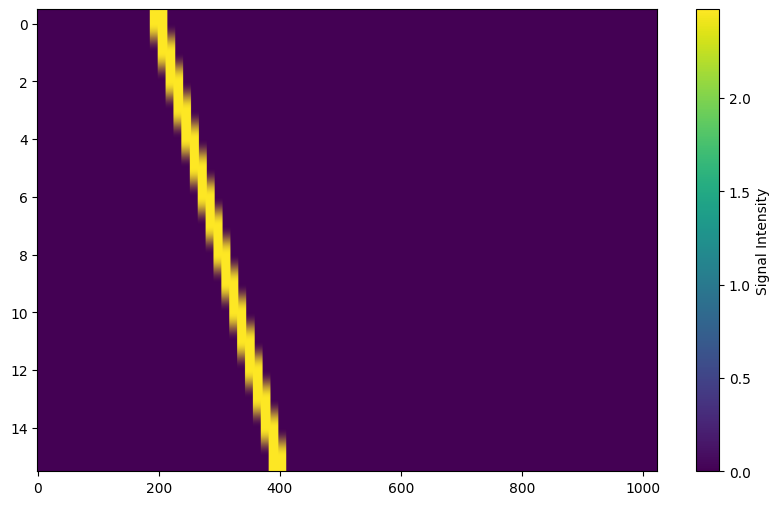

In [9]:
fig = plt.figure(figsize=(10, 6))
plt.imshow(signal, aspect='auto')
plt.colorbar(label='Signal Intensity')
plt.show()
fig = plt.figure(figsize=(10, 6))
plt.imshow(signal, aspect='auto')
plt.colorbar(label='Signal Intensity')
plt.show()